In [26]:
#Importing necessary libraries

import matplotlib.pyplot as plt #for visualisation of complex data
import seaborn as sns #for visualisation of 
import numpy as np  # linear algebra
import pandas as pd # data processing
from sklearn.linear_model import LinearRegression #for algo of linear regression
from sklearn.metrics import mean_squared_error,r2_score #for evaluation of prediction model
from sklearn.model_selection import train_test_split   #for data splitting

### Data Reading

In [2]:
data=pd.read_csv('forestfires.csv',low_memory=False)     #Reading data from csv
df=pd.DataFrame(data)                                #The dataset is loaded into a DataFrame named df.

### Data Inspection

In [3]:
#Displaying the first few rows of the dataset
print("First few values: \n")
df.head()

First few values: 



,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
#Displaying the information about the dataset
df.info()
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB



In [5]:
#Counting the number of null values in each column
null_Val=df.isnull().sum() 
print("No. of null values: \n",null_Val)
print()

No. of null values: 
 X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64



There are no null values so we don't need to drop any cols.

In [6]:
#Deciding label and features
X=df[['temp','wind','rain','RH']]
Y=df['area']

In [7]:
#Splitting the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

#here, the values of test_size and random_state can be changed.We can do trial and error in order to check the data.

In [8]:
#model training
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [9]:
#predicting the values
y_pred=model.predict(x_test)

In [10]:
#evaluate
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print("r2 is: ",r2,"mse is",mse)

#we changed the values of test_size and random_state as we can see the chance for error is high (9414.25...) while the probability of the data model working fine is very less(0.0063...)

r2 is:  0.0063256704077582215 mse is 9414.259278032454


In [50]:
#taking user input
def get_user_input():
    try:
        temp=float(input("Enter temperature "))
        RH=int(input("Enter RH "))
        wind=float(input("Enter wind value "))
        rain=float(input("Enter rain value "))

        return pd.DataFrame({'temp':[temp],
                         'wind':[wind],'rain':[rain],'RH':[RH]})
    except ValueError:
        print("Invalid Input! Enter again")
        return get_user_input()
    
# new_data=get_user_input()

# new_prediction=model.predict(new_data)

def createDataFrame():
    number_of_values = int(input('Enter the number of Values you wish to put:'))
    dataList = []
    for i in range(number_of_values):
        print("Enter row:",i+1)
        dataList.append(get_user_input())
        print()
        
    dataList = pd.concat(dataList)
    return dataList
# print("Effected area by fire can be: ",new_prediction)

Enter the number of Values you wish to put: 2


Enter row: 1


Enter temperature  2
Enter RH  2
Enter wind value  2
Enter rain value  2



Enter row: 2


Enter temperature  4
Enter RH  4
Enter wind value  4
Enter rain value  4



2 2


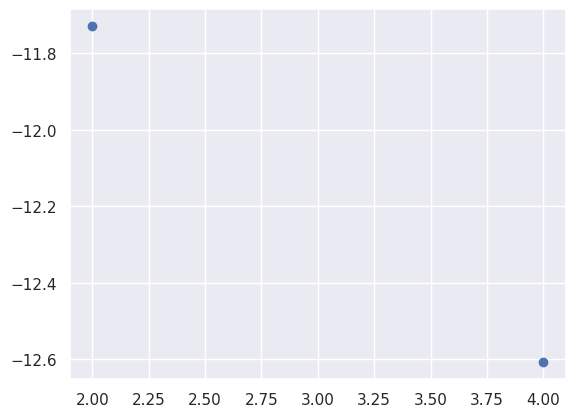

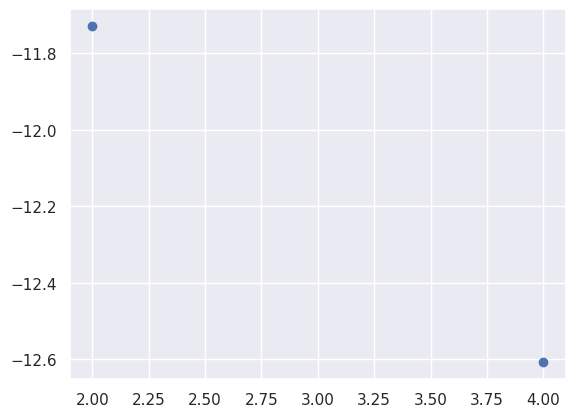

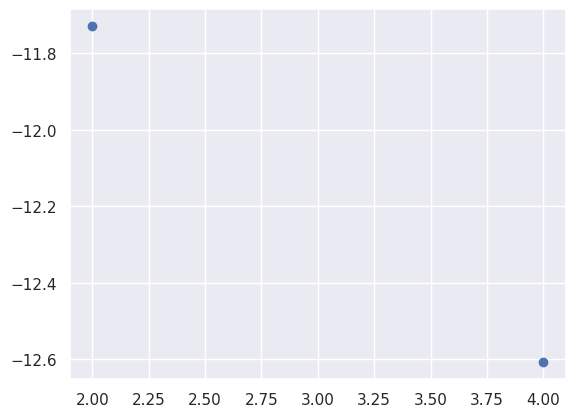

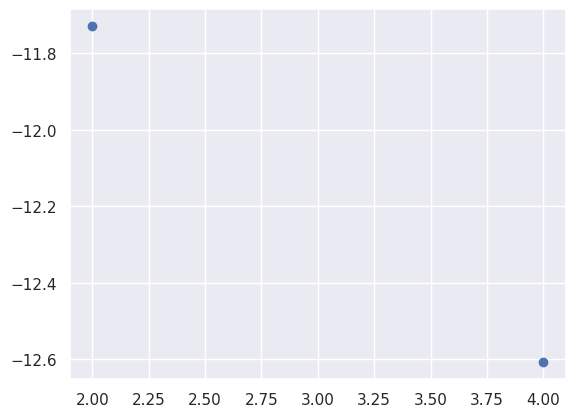

In [57]:
userData = createDataFrame()
predictedResults = model.predict(userData)
print(len(predictedResults),len(userData))

plt.scatter(userData['temp'],predictedResults)
plt.show()

plt.scatter(userData['wind'],predictedResults)
plt.show()

plt.scatter(userData['rain'],predictedResults)
plt.show()

plt.scatter(userData['RH'],predictedResults)
plt.show()

### Actual vs Predicted values

Text(0, 0.5, 'Predicted values\n')

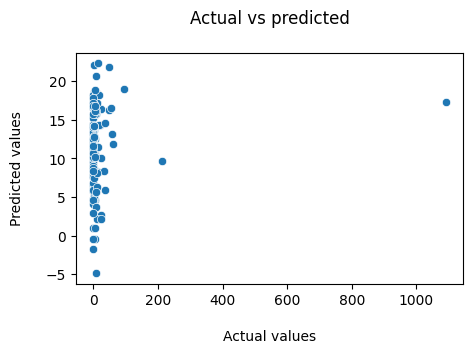

In [12]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=y_test,y=y_pred)
plt.title('Actual vs predicted\n')
plt.xlabel('\nActual values')
plt.ylabel('Predicted values\n')


### Residual Plot

Text(0, 0.5, 'Residuals\n')

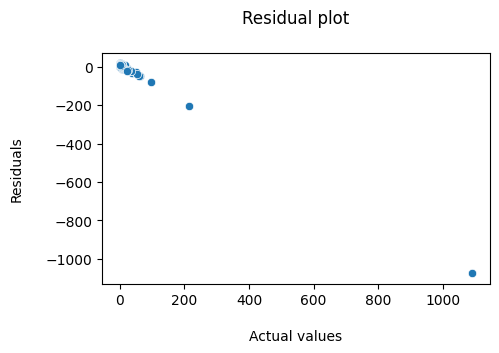

In [13]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=y_test,y=y_pred - y_test)
plt.title('Residual plot\n')
plt.xlabel('\nActual values')
plt.ylabel('Residuals\n')


### Distribution of Predicted values

Text(0, 0.5, 'Frequency\n')

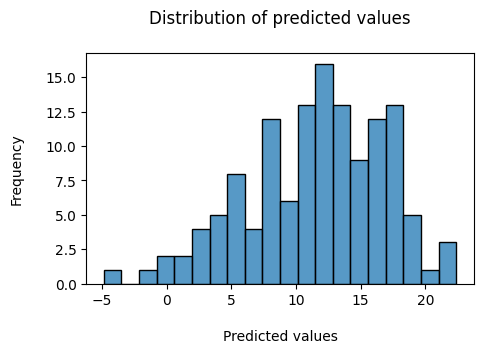

In [14]:
plt.figure(figsize=(5,3))
sns.histplot(y_pred,bins=20)
plt.title('Distribution of predicted values\n')
plt.xlabel('\nPredicted values')
plt.ylabel('Frequency\n')

### Correlation matrix heatmap

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

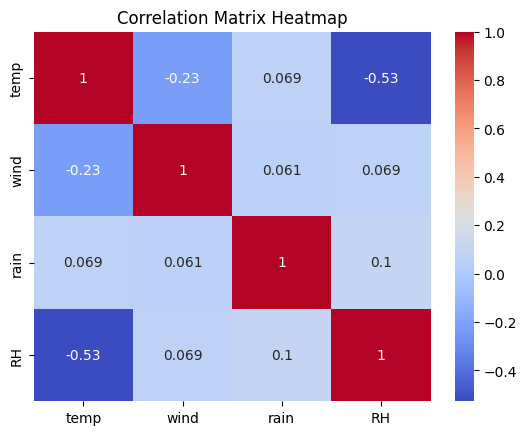

In [15]:
corr_matrix=X.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")

### Feature importance

Text(0, 0.5, 'Importance\n')

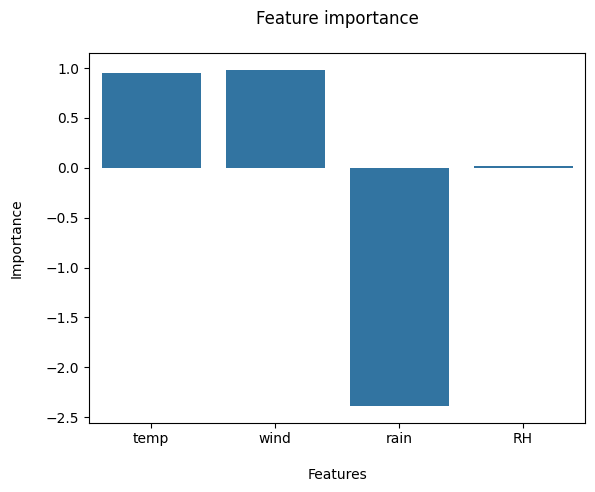

In [16]:
feature_importance=model.coef_    #finding coefficient of each feature while model training
sns.barplot(x=X.columns,y=feature_importance)
plt.title('Feature importance\n')
plt.xlabel('\nFeatures')
plt.ylabel('Importance\n')

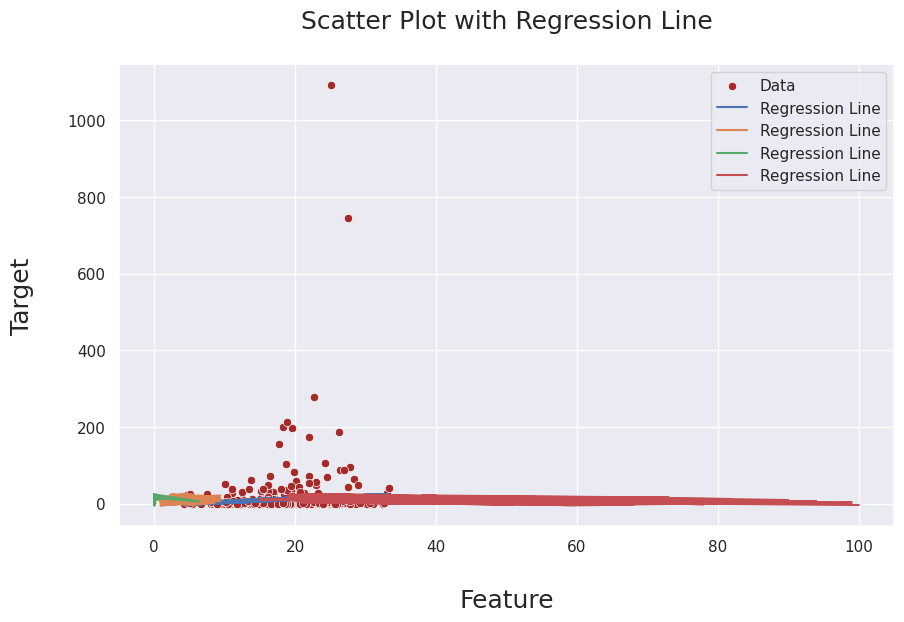

In [25]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,6))

# Scatter plot
sns.scatterplot(x='temp', y='area', color='brown', data=df,label="Data")

# Regression line
# y_pred is for X_test only, where X is entire data, so
y_complete_pred = model.predict(X)

plt.plot(X, y_complete_pred, label='Regression Line')

# Title and labels
plt.title('Scatter Plot with Regression Line\n', fontsize=18)
plt.xlabel('\nFeature', fontsize=18)
plt.ylabel('Target\n', fontsize=18)
plt.legend()
plt.show()

In [41]:
def get_user_input():
    try:
        data = {
            'temp':[float(input("Enter the temperature:"))],
            'wind':[float(input("Enter the wind speed:"))],
            'rain':[float(input("Enter the rain value:"))],
            'RH':[int(input("Enter the relative humidity:"))],
        }
        return pd.DataFrame(data)
    except ValueError:
        print("Invalid Values! Enter the values again.")
        print()
        return get_user_input()

In [45]:
user_data = get_user_input()
y_pred_user_data = model.predict(user_data)
print("Area of effect:",y_pred_user_data)

Enter the temperature: 9
Enter the wind speed: 9
Enter the rain value: 9
Enter the relative humidity: 9


Area of effect: [-14.80397838]


In [43]:
user_data

,temp,wind,rain,RH
0,9.0,9.0,9.0,9


In [44]:
x_test

,temp,wind,rain,RH
304,11.3,4.9,0.0,94
501,21.6,4.9,0.8,65
441,25.5,1.8,0.0,29
153,20.1,4.9,0.0,47
503,29.2,4.9,0.0,30
...,...,...,...,...
19,9.3,4.5,0.0,44
505,26.7,1.8,0.0,35
340,19.3,2.2,0.0,44
56,17.8,4.9,0.0,63
